YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


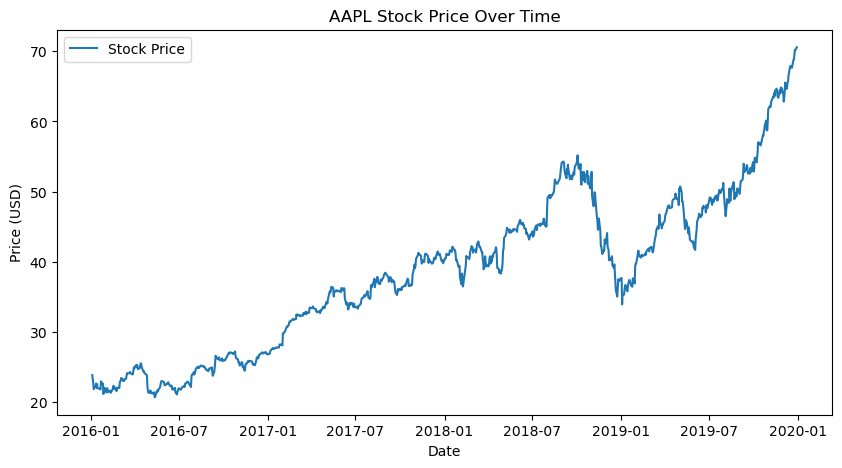

ADF Statistic: 0.5960774129865977
p-value: 0.9875185440252793
Data is NOT stationary
ADF Statistic: -9.205432747587805
p-value: 1.9507212657810504e-15
Data is stationary


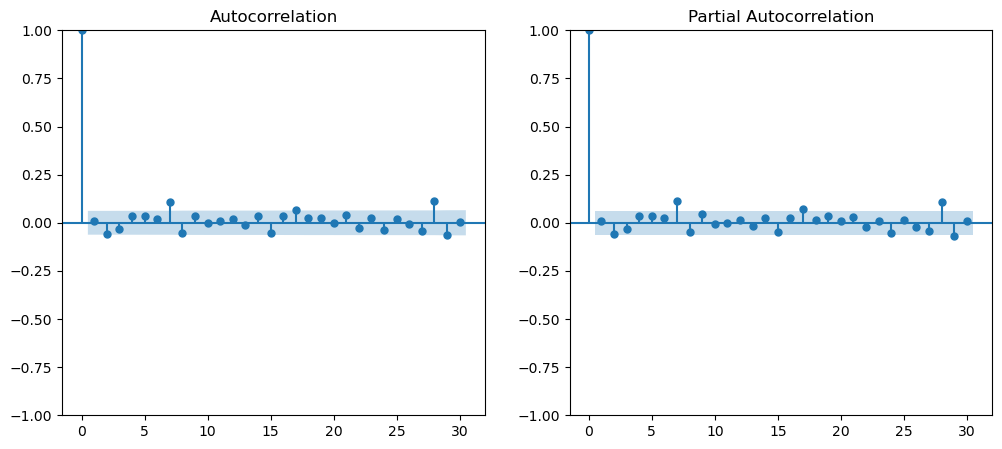

/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/personal-ds-projects/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predicti

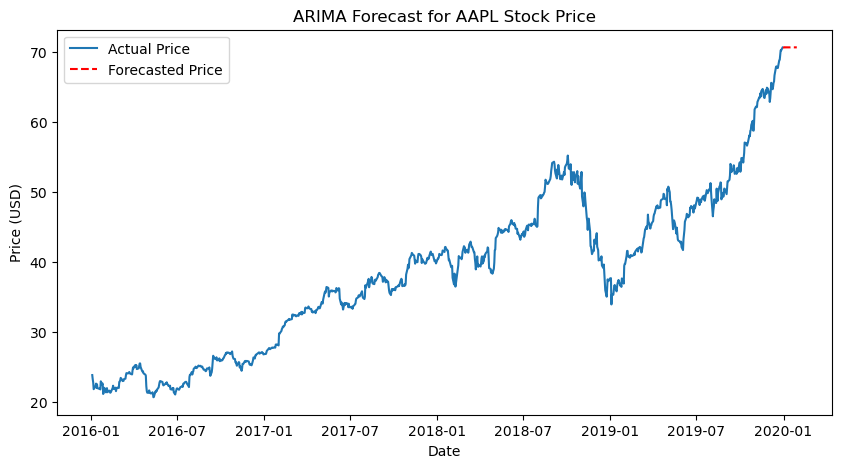

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fetch Data from Yahoo Finance
ticker = 'AAPL'  # Apple stock
df = yf.download(ticker, start="2016-01-01", end="2019-12-31")

# Keep only the 'Close' price
df = df[['Close']]
df.columns = ['Price']
df.index = pd.to_datetime(df.index)

# Plot the stock price trend
plt.figure(figsize=(10,5))
plt.plot(df['Price'], label='Stock Price')
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Step 2: Check for stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

adf_test(df['Price'])

# Step 3: Differencing to make the series stationary
df['Price_diff'] = df['Price'].diff().dropna()
adf_test(df['Price_diff'].dropna())

# Step 4: Determine ARIMA parameters using ACF & PACF
fig, axes = plt.subplots(1,2, figsize=(12,5))
sm.graphics.tsa.plot_acf(df['Price_diff'].dropna(), lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['Price_diff'].dropna(), lags=30, ax=axes[1])
plt.show()

# Step 5: Fit ARIMA Model (Using p=1, d=1, q=1 for simplicity)
model = ARIMA(df['Price'], order=(1,1,1))
arima_result = model.fit()

# Step 6: Forecast future prices
forecast_steps = 30  # Predict next 30 days
forecast = arima_result.forecast(steps=forecast_steps)

# Plot forecasted vs actual prices
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Price'], label='Actual Price')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, 
         label='Forecasted Price', linestyle='dashed', color='red')
plt.title(f"ARIMA Forecast for {ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
